In [1]:
import torch
from pathlib import Path

from app.model.utils.checkpointer import Checkpointer
from app.model.utils.tokenizer import Tokenizer

checkpoint_path = Path('app/data/models/3.35M_1.02K/0/700/state.pkl')
model, optimizer, evaluator, config = Checkpointer.load_checkpoint(
    checkpoint_path)
tokenizer = Tokenizer()
tokenizer.load()

Loaded checkpoint app/data/models/3.35M_1.02K/0/700/state.pkl


In [2]:
sequence = 'One day, a boy named Tim saw a pale'
max_gen_len = 200
end_token = '<|endoftext|>'
while max_gen_len:
    tokens = torch.tensor(tokenizer.encode(sequence))
    next_token = model.generate_next_token(tokens).item()
    decoded_next_token = tokenizer.decode([int(next_token)])
    if sequence.endswith(end_token):
        break
    sequence += decoded_next_token
    max_gen_len -= 1
sequence

'One day, a boy named Tim saw a pale and playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with the playing with'

In [3]:
evaluator.metrics['cross_entropy'].values[-1]

tensor(4.0994)

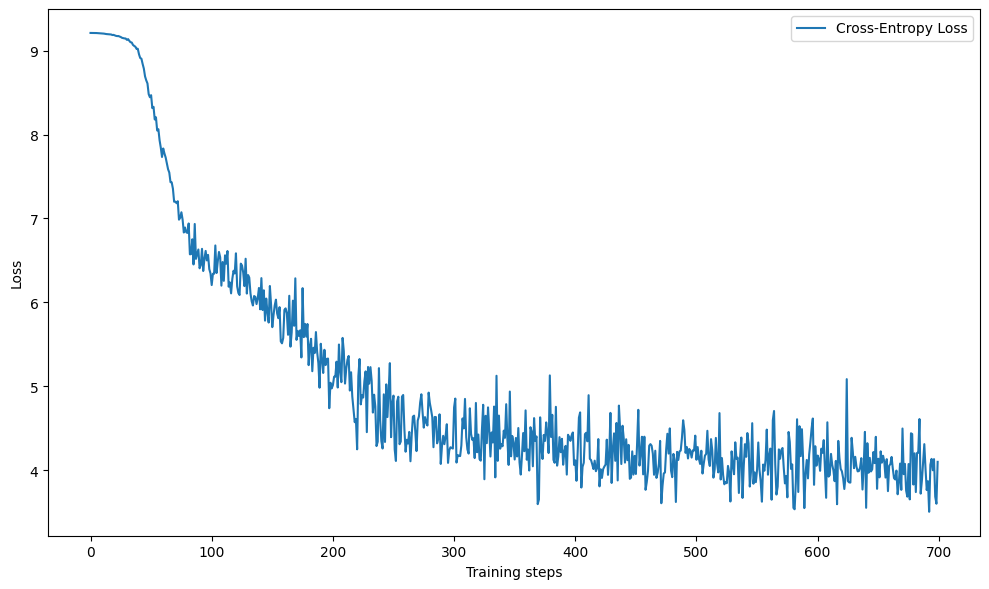

In [4]:
import matplotlib.pyplot as plt

cross_entropy_values = evaluator.metrics['cross_entropy'].values
steps = range(len(cross_entropy_values))

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(steps, cross_entropy_values, label='Cross-Entropy Loss')
plt.xlabel('Training steps')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()